## Shortest Path Between Any Two Localities

Enter the location of starting point and ending point of your journey and get the shortest path between them

### NetworkX

Enter start node:  B
Enter goal node:  H



Bi-Directional BFS Path: ['B', 'A', 'C', 'H']
Standard BFS Path: ['B', 'A', 'C', 'H']
Standard DFS Path: ['B', 'A', 'C', 'H']
Shortest Weighted Path using Dijkstra: ['B', 'A', 'C', 'H'] with cost 9


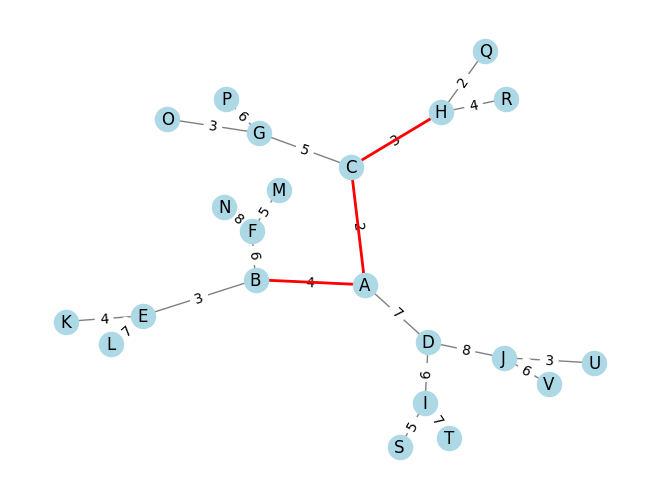

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from collections import deque

def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start]

    forward_queue = deque([start])
    backward_queue = deque([goal])
    forward_visited = {start: None}
    backward_visited = {goal: None}

    while forward_queue and backward_queue:
        if forward_queue:
            node = forward_queue.popleft()
            for neighbor in graph[node]:
                if neighbor not in forward_visited:
                    forward_visited[neighbor] = node
                    forward_queue.append(neighbor)
                if neighbor in backward_visited:
                    return construct_path(forward_visited, backward_visited, neighbor)

        if backward_queue:
            node = backward_queue.popleft()
            for neighbor in graph[node]:
                if neighbor not in backward_visited:
                    backward_visited[neighbor] = node
                    backward_queue.append(neighbor)
                if neighbor in forward_visited:
                    return construct_path(forward_visited, backward_visited, neighbor)

    return None  

def construct_path(forward_visited, backward_visited, meeting_point):
    path = []
    node = meeting_point
    while node:
        path.append(node)
        node = forward_visited[node]
    path.reverse()
    node = backward_visited[meeting_point]
    while node:
        path.append(node)
        node = backward_visited[node]
    return path

def bfs(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        node, path = queue.popleft()
        if node == goal:
            return path
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                queue.append((neighbor, path + [neighbor]))
    return None

def dfs(graph, start, goal, path=None, visited=None):
    if visited is None:
        visited = set()
    if path is None:
        path = [start]

    if start == goal:
        return path

    visited.add(start)
    for neighbor in graph[start]:
        if neighbor not in visited:
            new_path = dfs(graph, neighbor, goal, path + [neighbor], visited)
            if new_path:
                return new_path
    return None

def dijkstra(graph, start, goal):
    priority_queue = [(0, start, [])] 
    visited = set()

    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)
        if node in visited:
            continue
        path = path + [node]
        visited.add(node)
        
        if node == goal:
            return path, cost
        
        for neighbor, weight in graph[node].items():
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path))
    
    return None, float('inf')

def visualize_graph(graph, path=None):
    G = nx.Graph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)  
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    
    edge_labels = {(u, v): f"{graph[u][v]}" for u in graph for v in graph[u]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if path:
        edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red', width=2)

    plt.show()

if __name__ == "__main__":
    city_graph = {
        'A': {'B': 4, 'C': 2, 'D': 7},
        'B': {'A': 4, 'E': 3, 'F': 6},
        'C': {'A': 2, 'G': 5, 'H': 3},
        'D': {'A': 7, 'I': 6, 'J': 8},
        'E': {'B': 3, 'K': 4, 'L': 7},
        'F': {'B': 6, 'M': 5, 'N': 8},
        'G': {'C': 5, 'O': 3, 'P': 6},
        'H': {'C': 3, 'Q': 2, 'R': 4},
        'I': {'D': 6, 'S': 5, 'T': 7},
        'J': {'D': 8, 'U': 3, 'V': 6},
        'K': {'E': 4},
        'L': {'E': 7},
        'M': {'F': 5},
        'N': {'F': 8},
        'O': {'G': 3},
        'P': {'G': 6},
        'Q': {'H': 2},
        'R': {'H': 4},
        'S': {'I': 5},
        'T': {'I': 7},
        'U': {'J': 3},
        'V': {'J': 6}
    }

    start, goal = input("Enter start node: "), input("Enter goal node: ")

    print("\nBi-Directional BFS Path:", bidirectional_bfs(city_graph, start, goal))
    print("Standard BFS Path:", bfs(city_graph, start, goal))
    print("Standard DFS Path:", dfs(city_graph, start, goal))

    dijkstra_path, dijkstra_cost = dijkstra(city_graph, start, goal)
    if dijkstra_path:
        print(f"Shortest Weighted Path using Dijkstra: {dijkstra_path} with cost {dijkstra_cost}")
    else:
        print("No path found using Dijkstra.")

    visualize_graph(city_graph, dijkstra_path)